# User Churn Prediction

In this project, we have a dataset of cell phone service customers. We will use supervised learning models to predict which customers will stop using the service. In addition, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing and Train/Test Split](#Part-2:-Feature-Preprocessing-and-Train/Test-Split)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Importance](#Part-4:-Feature-Importance)
</ul>

# Part 1: Data Exploration

### Part 1.1: Import the Raw Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('churn.all')
df.shape

(5000, 21)

In [2]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object

In [3]:
df.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### Part 1.2: Data cleaning

Let's first check if there are NANs in the data frame

In [4]:
df.isnull().sum() # there are no NANs

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

``intl_plan``, ``voice_mail_plan``, and ``churned`` are categorical features with binary variables, so we can just transform them to 0 and 1.

In [5]:
# Note that there are white spaces in the strings
df.voice_mail_plan = df.voice_mail_plan.map({' no': 0, ' yes':1})
df.intl_plan = df.intl_plan.map({' no': 0, ' yes':1})
df.churned = df.churned.map({' False.': 0, ' True.':1})

In [6]:
df.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,329-9001,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,335-4719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,330-8173,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


### Part 1.3:  Data Analysis and Visualization

#### Statistical Overview
Let's check the differences between the users who continue using the service and who do not

In [7]:
df.churned.value_counts() / len(df)

0    0.8586
1    0.1414
Name: churned, dtype: float64

First, we should note that this is an unbalanced dataset. Only ~ 14% of the users stopped using the sercice.

In [8]:
# Compare the mean values of features between the two classes 
df.groupby('churned').mean().drop(['area_code'], axis=1)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,,,,,,,,,,,,,,,,,
0,99.917074,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
1,102.332390,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


#### K-S Tests

We can use K-S tests to check whether the distributions of each feature of the two classes are drawn from the same distribution. Note that for ``intl_plan`` and ``voice_mail_plan``, the values are either 0 or 1, so checking the mean values of the two groups (as shown above) is enough.

In [9]:
from scipy.stats import ks_2samp

def run_KS_test(feature):

    dist1 = df.loc[df.churned == 0,feature]
    dist2 = df.loc[df.churned == 1,feature]
    print feature+':'
    print ks_2samp(dist1,dist2),'\n'

run_KS_test('number_vmail_messages')    
run_KS_test('total_day_minutes')
run_KS_test('total_day_calls')
run_KS_test('total_day_charge')
run_KS_test('total_eve_minutes')
run_KS_test('total_eve_calls')
run_KS_test('total_eve_charge')
run_KS_test('total_night_minutes')
run_KS_test('total_night_calls')
run_KS_test('total_night_charge')
run_KS_test('total_intl_minutes')
run_KS_test('total_intl_calls')
run_KS_test('total_intl_charge')
run_KS_test('number_customer_service_calls')

number_vmail_messages:
Ks_2sampResult(statistic=0.13991198460966192, pvalue=7.5021315883731713e-11) 

total_day_minutes:
Ks_2sampResult(statistic=0.30453806087407176, pvalue=8.0509459964072132e-50) 

total_day_calls:
Ks_2sampResult(statistic=0.037431416097584602, pvalue=0.35668465961896823) 

total_day_charge:
Ks_2sampResult(statistic=0.30453806087407176, pvalue=8.0509459964072132e-50) 

total_eve_minutes:
Ks_2sampResult(statistic=0.11320491138661631, pvalue=2.9892973748115123e-07) 

total_eve_calls:
Ks_2sampResult(statistic=0.02443964072957161, pvalue=0.85734316224392693) 

total_eve_charge:
Ks_2sampResult(statistic=0.11320491138661631, pvalue=2.9892973748115123e-07) 

total_night_minutes:
Ks_2sampResult(statistic=0.062743830537591028, pvalue=0.016006448527058535) 

total_night_calls:
Ks_2sampResult(statistic=0.030211017507860399, pvalue=0.63036853940854265) 

total_night_charge:
Ks_2sampResult(statistic=0.062277955857879874, pvalue=0.017191586699967065) 

total_intl_minutes:
Ks_2samp

We see that the p-values for the numbers of calls during daytime, evening, and nighttime are pretty high (>35%), so we cannot reject the null hypothesis that the distributions of the two samples are the same. In contrast, the p-values of the other features are all very low, showing that the two samples are not drawn from the same distribution. This suggests that the numbers of calls are not relevant, and what matters is the total minutes/charge of the calls. 

#### Distribution Plots

In addition to K-S tests, we can also visualize the distributions of the two classes.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions for the numerical features
def DensityPlot(feature):
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(df.loc[df.churned == 0,feature], color='b',shade=True, label="stay")
    sns.kdeplot(df.loc[df.churned == 1,feature], color='r',shade=True, label="churn")
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

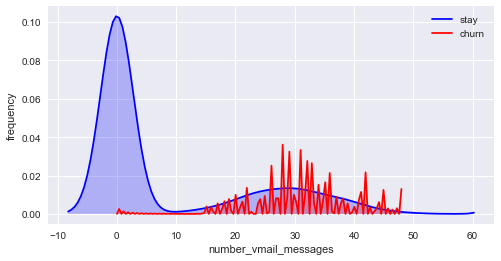

In [11]:
DensityPlot('number_vmail_messages')

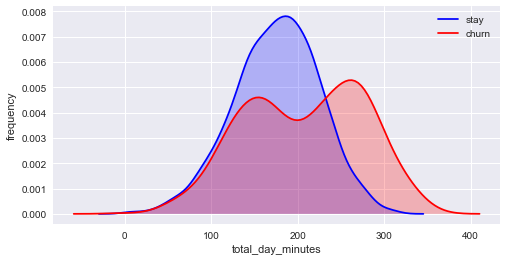

In [12]:
DensityPlot('total_day_minutes')

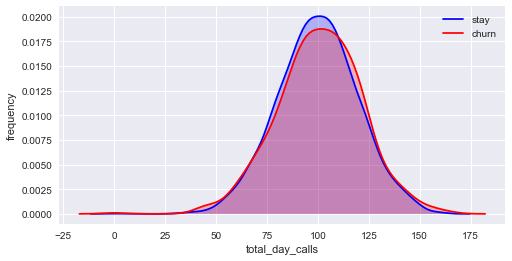

In [13]:
DensityPlot('total_day_calls')

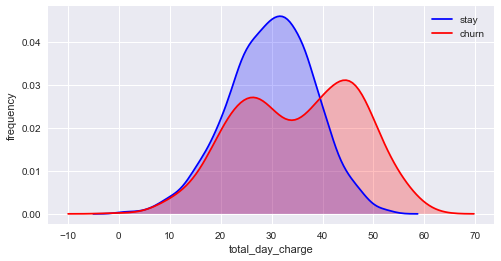

In [14]:
DensityPlot('total_day_charge')

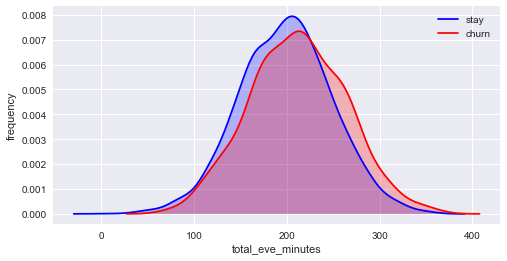

In [15]:
DensityPlot('total_eve_minutes')

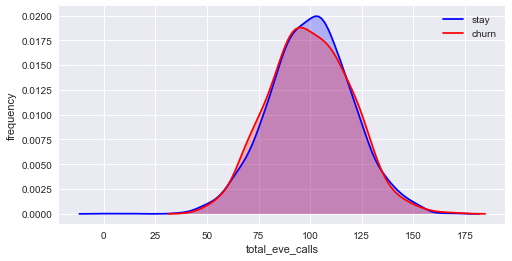

In [16]:
DensityPlot('total_eve_calls')

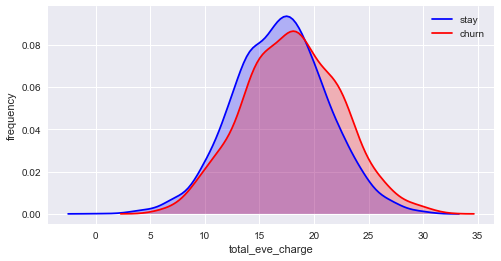

In [17]:
DensityPlot('total_eve_charge')

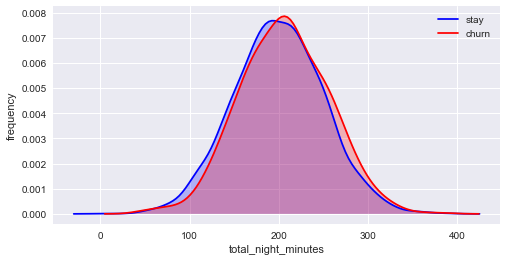

In [18]:
DensityPlot('total_night_minutes')

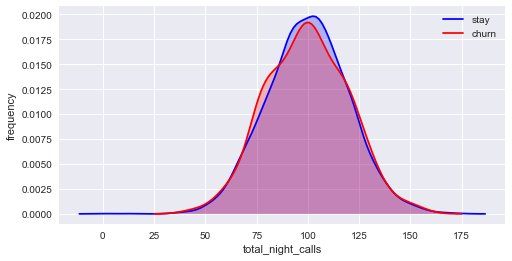

In [19]:
DensityPlot('total_night_calls')

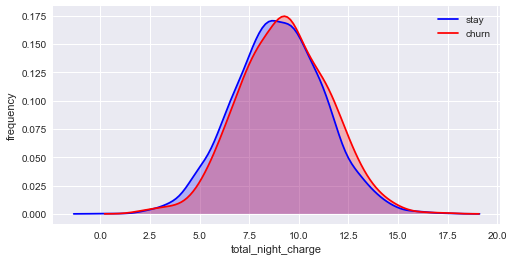

In [20]:
DensityPlot('total_night_charge')

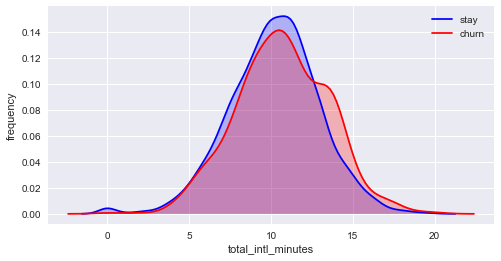

In [21]:
DensityPlot('total_intl_minutes')

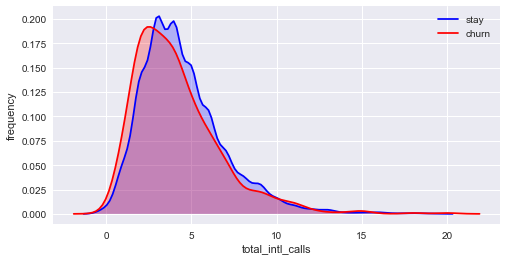

In [22]:
DensityPlot('total_intl_calls')

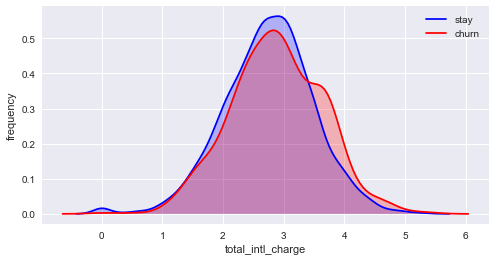

In [23]:
DensityPlot('total_intl_charge')

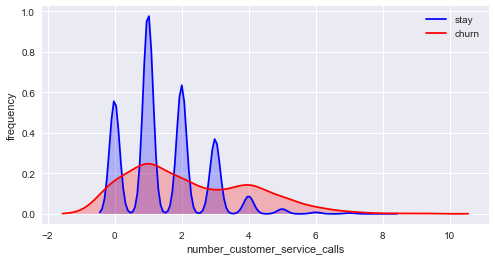

In [24]:
DensityPlot('number_customer_service_calls')

#### Correlation Matrix & Heatmap
Let's see the correlations between different numerical features

In [25]:
corr = df.drop(['area_code'], axis=1).corr()
corr

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
account_length,1.000000,0.014681,-0.006650,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445,0.021203
intl_plan,0.014681,1.000000,0.009054,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031751,-0.012974,0.259123
voice_mail_plan,-0.006650,0.009054,1.000000,0.954508,0.002059,-0.001735,0.002056,0.023328,-0.005916,0.023332,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004165,-0.014453,-0.110698
number_vmail_messages,-0.014575,0.011947,0.954508,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,0.028138,0.002059,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705
total_day_calls,0.028240,0.008102,-0.001735,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,0.028141,0.002056,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.021235,0.023328,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823,0.089288
total_eve_calls,0.009143,0.002505,-0.005916,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235,-0.006284
total_eve_charge,-0.009587,0.021234,0.023332,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836,0.089282


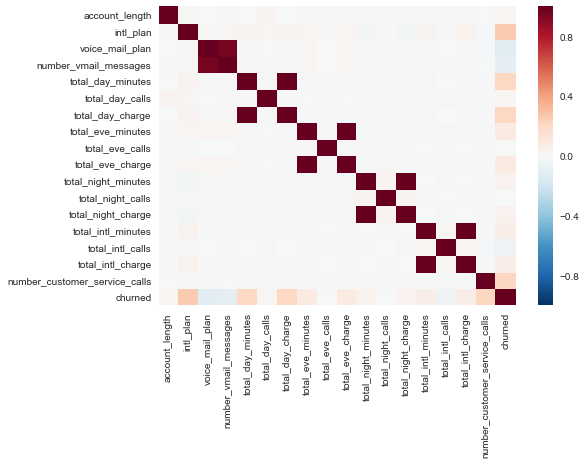

In [26]:
sns.heatmap(corr)
plt.show()

We can see that the minutes and charge of calls perfectly correlate with each other, which means they have repeated information. Keeping both the minutes and charge of calls would be redundant. We will therefore remove all the minutes. Also, ``voice_mail_plan`` and ``number_vmail_messages`` are highly correlated. We can remove ``voice_mail_plan``, since ``number_vmail_messages`` = 0 essentially means ``voice_mail_plan`` = 0.

# Part 2: Feature Preprocessing and Train/Test Split

In [27]:
# Get the labels
y = df['churned'].values

# Drop the useless columns: 1. irrelevant featues 2. featuers with repeated info 3. the labels
to_drop = ['state','account_length','area_code','phone_number','voice_mail_plan',
           'total_day_calls','total_day_minutes','total_eve_calls','total_eve_minutes',
           'total_night_calls','total_night_minutes','total_intl_calls',
           'total_intl_minutes','churned']

X = df.drop(to_drop, axis=1)

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
X.head(10)

,intl_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
0,0,25,45.07,16.78,11.01,2.70,1
1,0,26,27.47,16.62,11.45,3.70,1
2,0,0,41.38,10.30,7.32,3.29,0
3,1,0,50.90,5.26,8.86,1.78,2
4,1,0,28.34,12.61,8.41,2.73,3
5,1,0,37.98,18.75,9.18,1.70,0
6,0,24,37.09,29.62,9.57,2.03,3
7,1,0,26.69,8.76,9.53,1.92,0
8,0,0,31.37,29.89,9.71,2.35,1
9,1,37,43.96,18.87,14.69,3.02,0


In [29]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training set and tranform both the training and test sets
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

# Part 3: Model Training and Result Evaluation

### Part 3.1: Train the Models with Grid Search

Here we use F1 score as the evaluation metric for grid search, in order to consider both precision and recall.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,make_scorer

F1 = make_scorer(f1_score)

####  Logistic Regression

In [31]:
lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)

parameters = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

Grid_LR = GridSearchCV(lr, parameters, scoring=F1)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.001  ,  0.00107, ...,  0.93325,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)

In [32]:
lr = Grid_LR.best_estimator_
print 'Best score: ', Grid_LR.best_score_
print 'Best parameters set: \n', Grid_LR.best_params_

Best score:  0.283887795118
Best parameters set: 
{'penalty': 'l2', 'C': 0.93325430079699057}


In [33]:
y_pred_lr = lr.predict(X_test)

#### KNN

In [34]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors':[2,3,5,7,10] 
}
Grid_KNN = GridSearchCV(knn, parameters, scoring=F1)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)

In [35]:
knn = Grid_KNN.best_estimator_
print 'Best score: ', Grid_KNN.best_score_
print 'Best parameters set: \n', Grid_KNN.best_params_

Best score:  0.633257682958
Best parameters set: 
{'n_neighbors': 3}


In [36]:
y_pred_knn = knn.predict(X_test)

#### Random Forest Classifier

In [37]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=0)

parameters = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

Grid_RF = GridSearchCV(rf, parameters, scoring=F1, n_jobs=-1)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4, 5, 6], 'min_samples_split': [4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)

In [38]:
rf = Grid_RF.best_estimator_
print 'Best score: ', Grid_RF.best_score_
print 'Best parameters set: \n', Grid_RF.best_params_

Best score:  0.769737391976
Best parameters set: 
{'max_features': 4, 'min_samples_split': 7, 'min_samples_leaf': 1}


In [39]:
y_pred_rf = rf.predict(X_test)

#### SVM

In [40]:
svm = SVC(probability=True)
C_grid = 10**(np.arange(0,1.01,0.01)*2)

parameters = {'C': C_grid}

Grid_SVM = GridSearchCV(svm, parameters, scoring=F1, n_jobs=-1)
Grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([   1.     ,    1.04713, ...,   95.49926,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)

In [41]:
svm = Grid_SVM.best_estimator_
print 'Best score: ', Grid_SVM.best_score_
print 'Best parameters set: \n', Grid_SVM.best_params_

Best score:  0.748467901039
Best parameters set: 
{'C': 54.954087385762456}


In [42]:
y_pred_svm = svm.predict(X_test)

### Part 3.2: Evaluation

In [43]:
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)
    print "F1 score is " + str(f1)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm = x[0], x[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logisitic Regression
Accuracy is 0.872
Precision is 0.575757575758
Recall is 0.188118811881
F1 score is 0.283582089552


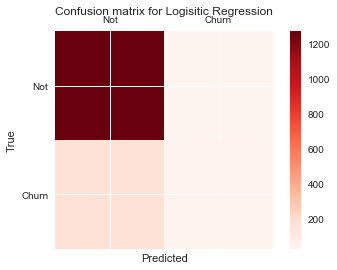

K-Nearest-Neighbors
Accuracy is 0.912666666667
Precision is 0.762962962963
Recall is 0.509900990099
F1 score is 0.611275964392


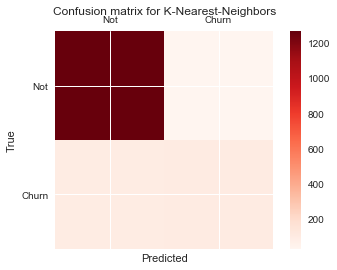

Random Forest
Accuracy is 0.946666666667
Precision is 0.912162162162
Recall is 0.668316831683
F1 score is 0.771428571429


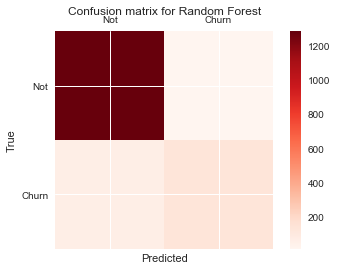

Support Vector Machine
Accuracy is 0.938666666667
Precision is 0.823529411765
Recall is 0.693069306931
F1 score is 0.752688172043


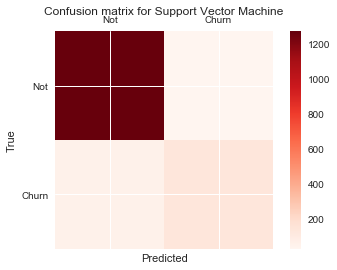

In [44]:
%matplotlib inline

confusion_matrices = [
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm))
]

draw_confusion_matrices(confusion_matrices)

Random Forest works the best. In the following, we will try to determine the optimal threshold for this model.

### Part 3.3: Fine-tune the Threshold of Random Forest

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

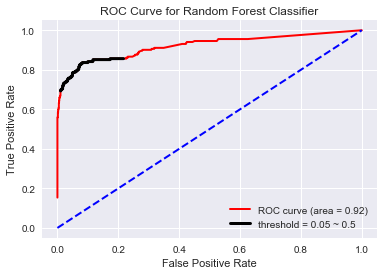

In [46]:
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.05 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Note that true positive rate and recall are actually equal. Since we care about recall in this project, we should use a lower threshold (< 0.5) to acheive higher recall, while keeping the false positive rate not too high. 

In [47]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

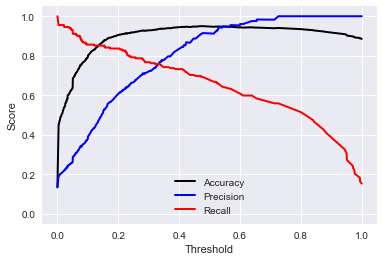

In [48]:
fig = plt.figure()

plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower")
plt.show()

Let's assume that we want to provide the customers who will likely to stop the service with a special offer, in order to prevent their drops. We want to target most of these customers, but we also don't want to falsely target too many people who actually won't stop using the service. We therefore have to fine-tune the threshold of our classifier in order to maximize the profitability.

In the following, we use a very simple way to estimate the profitability:
- If a customer stop the service, we lose 1 point
- If a customer takes the special offer we provide and continue using the service, we lose 0.1 point
- If we do nothing and a customer continue using the service, we lose nothing and get 0 point
- We assume that half of the customers who were going to drop will take the offer, and all the the customers who were not going to drop will take the offer.

Note that these are just assumptions for a case study.

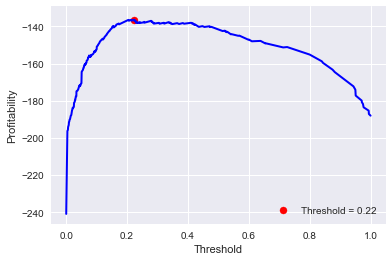

In [49]:
P = 0.5 # The chance a customer who was going to drop would take the special offer
profitability = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[profitability == max(profitability)][0]
    
fig = plt.figure()
plt.plot(thresh, profitability, color='b', lw=2)
plt.scatter([thresh_best], [max(profitability)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Profitability')
plt.legend(loc="lower right")
plt.show()

Now let's take a look at the confusion matrix based on the new threshold.

Random Forest
Accuracy is 0.912
Precision is 0.63358778626
Recall is 0.821782178218
F1 score is 0.715517241379


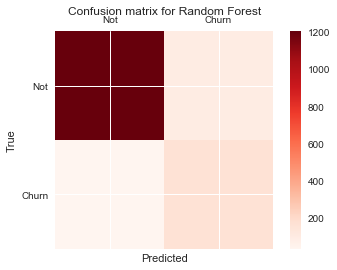

In [50]:
y_pred_new = y_prob > thresh_best

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, y_pred_new))
]

draw_confusion_matrices(confusion_matrices)

# Part 4: Feature Importance

In [51]:
importances = rf.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_charge: 0.3098
total_eve_charge: 0.1825
number_customer_service_calls: 0.1345
total_night_charge: 0.1225
total_intl_charge: 0.098
intl_plan: 0.0888
number_vmail_messages: 0.064


In [52]:
print "Logistic Regression Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), lr.coef_[0]), \
                      X.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression Coefficients
total_day_charge: 0.73
number_customer_service_calls: 0.7023
intl_plan: 0.5629
number_vmail_messages: -0.3983
total_eve_charge: 0.3738
total_night_charge: 0.2217
total_intl_charge: 0.2139
